In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('wine.csv')
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
x = df.drop('Wine', axis = 1)
y = df['Wine']

##  Forward Feature Selection

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [6]:
log_reg = LogisticRegression()
sfs = SequentialFeatureSelector(log_reg, n_features_to_select= 8, direction='forward')
sfs.fit(x,y)

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=8)

In [7]:
sfs.get_support()

array([ True, False,  True,  True, False,  True,  True,  True, False,
       False,  True,  True, False])

In [8]:
x.columns[sfs.get_support()]

Index(['Alcohol', 'Ash', 'Acl', 'Phenols', 'Flavanoids',
       'Nonflavanoid.phenols', 'Hue', 'OD'],
      dtype='object')

## Backward Forward Selection

In [13]:
log_reg = LogisticRegression()
sfs = SequentialFeatureSelector(log_reg, n_features_to_select= 8, direction='backward')
sfs.fit(x,y)

SequentialFeatureSelector(direction='backward', estimator=LogisticRegression(),
                          n_features_to_select=8)

In [14]:
sfs.get_support()

array([ True,  True, False,  True, False, False,  True, False,  True,
        True, False,  True,  True])

In [15]:
x.columns[sfs.get_support()]

Index(['Alcohol', 'Malic.acid', 'Acl', 'Flavanoids', 'Proanth', 'Color.int',
       'OD', 'Proline'],
      dtype='object')

In [ ]:
FFS
PCA

200
FFS
100 keep
100 discard

PCA 
reduce the dimension by 100

In [ ]:
1. name
gender
dob
policy, income, marital , dependents, 

## Embedded Method

In [16]:
from sklearn.ensemble import RandomForestClassifier

<AxesSubplot:>

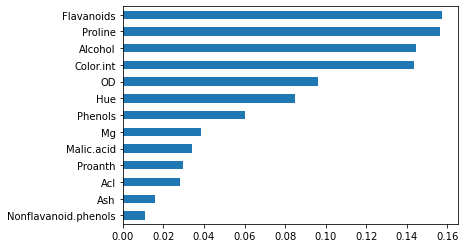

In [18]:
rf_model = RandomForestClassifier()
rf_model.fit(x,y)
f_imp = rf_model.feature_importances_
s1 = pd.Series(f_imp, index=x.columns)
s1.sort_values().plot(kind='barh')